<h1 align="center">  Object Detection with YOLOv5 </h1>

This tutorial will illustrate how to train a YOLOv5 object detection model via our AI training platform.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/detection/yolov5/yolov5/

/content/drive/MyDrive/detection/yolov5/yolov5


# Prerequisites
First of all, we have to install the libraries. Python>=3.8 is required. For other libraries, you can check the `requirements.txt` file. Installing these packages is simple. You can install them by running:


In [10]:
!pip install -r requirements.txt

     |████████████████████████████████| 645kB 7.5MB/s 
     |████████████████████████████████| 4.8MB 34.8MB/s 
     |████████████████████████████████| 4.5MB 49.4MB/s 
     |████████████████████████████████| 471kB 44.2MB/s 
  Created wheel for onnx-simplifier: filename=onnx_simplifier-0.3.6-cp37-none-any.whl size=12877 sha256=20fb1dbd1fa34a2e3b78abf9955d1c33960ff580f71b112ad1524ba7829bb7fa
  Stored in directory: /root/.cache/pip/wheels/6b/ad/63/753b75e81c462465ed01abfed4bb0d3ce61f415e4ee72a6c87
Successfully built onnx-simplifier
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Dataset & Preparation

Next, we need a dataset for the training model. In this tutorial, let's use the COCO 128 dataset. This dataset has been saved in `/coco128` next to the `/yolov5` directory.

In [ ]:
!ls ..

exporting  generate_npy  image_data  yolov5


The `coco128.yaml` is prepared under the folder `/yolov5/data/`.

In [11]:
!cat data/coco128.yaml

# COCO 2017 dataset http://cocodataset.org - first 128 training images
# Train command: python train.py --data coco128.yaml
# Default dataset location is next to /yolov5:
#   /parent_folder
#     /coco128
#     /yolov5

# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: ../../coco128/images/train2017/  # 128 images
val: ../../coco128/images/train2017/  # 128 images

# number of classes
nc: 80

# class names
names: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 

# Train 

We download the pretrained model from [Model_Zoo](https://github.com/kneron/Model_Zoo/tree/main/detection/yolov5/yolov5s-noupsample). Suppose we would like to finetune a pretrained model for 520 and just run 2 epochs. Execute commands in the folder `yolov5`:

In [12]:
!wget https://raw.githubusercontent.com/kneron/Model_Zoo/main/detection/yolov5/yolov5s-noupsample/best.pt

--2021-06-04 02:47:35--  https://raw.githubusercontent.com/kneron/Model_Zoo/main/detection/yolov5/yolov5s-noupsample/best.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13758885 (13M) [application/octet-stream]
Saving to: ‘best.pt’

best.pt             100%[===================>]  13.12M  37.3MB/s    in 0.4s    

2021-06-04 02:47:37 (37.3 MB/s) - ‘best.pt’ saved [13758885/13758885]



In [13]:
!CUDA_VISIBLE_DEVICES='0' python train.py --data coco128.yaml --cfg yolov5s-noupsample.yaml --weights 'best.pt' --batch-size 8 --epoch 2

Using torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109MB)

Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='./models/yolov5s-noupsample.yaml', data='./data/coco128.yaml', device='', epochs=2, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/exp', single_cls=False, sync_bn=False, total_batch_size=8, weights='best.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2021-06-04 02:48:26.359296: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 

The trained model weights are saved in `runs/train/exp/weights/best.pt`


# Generating .npy for different model input
We can generating `.npy` for different model input by using `yolov5_generate_npy.py`. Execute commands in the folder `generate_npy`:

In [14]:
cd ../generate_npy

/content/drive/My Drive/detection/yolov5/generate_npy


In [15]:
!python yolov5_generate_npy.py --input-h 256 --input-w 480

We could get `*.npy` files.

In [16]:
!ls ../generate_npy

20_480x256.npy	40_480x256.npy	80_480x256.npy	yolov5_generate_npy.py


# Configure the paths yaml file
You are expected to create a yaml file which stores all the paths related to the trained models. You can check and modify the `pretrained_paths_520.yaml` and `pretrained_paths_720.yaml` under `/yolov5/data/`. Here is the config for our model trained on COCO128 `model_paths_520_coco128.yaml`:

In [17]:
cd ../yolov5/

/content/drive/My Drive/detection/yolov5/yolov5


In [18]:
!cat data/model_paths_520_coco128.yaml

grid_dir: ../generate_npy/
grid20_path: ../generate_npy/20_480x256.npy
grid40_path: ../generate_npy/40_480x256.npy
grid80_path: ../generate_npy/80_480x256.npy

yolov5_dir: ./
path: ./runs/train/exp/weights/best.pt
yaml_path: ./models/yolov5s-noupsample.yaml
pt_path: ./yolov5s-noupsample-coco128.pt   # pytorch 1.4
onnx_export_file: ./yolov5s-noupsample-coco128.onnx

input_w: 480
input_h: 256
# number of classes
nc: 80
# class names
names: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        

# Save and Convert to ONNX
For now, we have trained the YOLOv5 model. This section will walk you through how to save the trained model for onnx converter supported format and convert to ONNX. 


## Exporting onnx model in the pytorch1.7 environment
We can convert the model to onnx by using `yolov5_export.py`. Execute commands in the folder `exporting`:

In [19]:
!python ../exporting/yolov5_export.py --data ../yolov5/data/model_paths_520_coco128.yaml

self.vanish_point 0.0

Starting ONNX export with onnx 1.6.0...
****onnx file**** ./yolov5s-noupsample-coco128.onnx
graph torch-jit-export (
  %images[FLOAT, 1x3x256x480]
) optional inputs with matching initializers (
  %model.2.cv2.weight[FLOAT, 32x64x1x1]
  %model.2.cv3.weight[FLOAT, 32x32x1x1]
  %model.2.bn.weight[FLOAT, 64]
  %model.2.bn.bias[FLOAT, 64]
  %model.2.bn.running_mean[FLOAT, 64]
  %model.2.bn.running_var[FLOAT, 64]
  %model.4.cv2.weight[FLOAT, 64x128x1x1]
  %model.4.cv3.weight[FLOAT, 64x64x1x1]
  %model.4.bn.weight[FLOAT, 128]
  %model.4.bn.bias[FLOAT, 128]
  %model.4.bn.running_mean[FLOAT, 128]
  %model.4.bn.running_var[FLOAT, 128]
  %model.6.cv2.weight[FLOAT, 128x256x1x1]
  %model.6.cv3.weight[FLOAT, 128x128x1x1]
  %model.6.bn.weight[FLOAT, 256]
  %model.6.bn.bias[FLOAT, 256]
  %model.6.bn.running_mean[FLOAT, 256]
  %model.6.bn.running_var[FLOAT, 256]
  %model.9.cv2.weight[FLOAT, 256x512x1x1]
  %model.9.cv3.weight[FLOAT, 256x256x1x1]
  %model.9.bn.weight[FLOAT, 512]
  

We could get `yolov5s-noupsample.onnx` or `yolov5s.onnx` under the folder `yolov5`. 
But the exported model is a little complicate, we have to simplify the model. 

In [20]:
!python -m onnxsim ./yolov5s-noupsample-coco128.onnx ./yolov5s-noupsample-coco128_simplify.onnx

Simplifying...
Checking 0/3...
Checking 1/3...
Checking 2/3...
Ok!


## Converting onnx by tool chain
Pull the latest [ONNX converter](https://github.com/kneron/ONNX_Convertor/tree/master/optimizer_scripts) from github. Execute commands in the folder `ONNX_Convertor/optimizer_scripts`:
(reference: https://github.com/kneron/ONNX_Convertor/tree/master/optimizer_scripts)

In [ ]:
!git clone https://github.com/kneron/ONNX_Convertor.git

Cloning into 'ONNX_Convertor'...
remote: Enumerating objects: 1135, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 1135 (delta 61), reused 50 (delta 27), pack-reused 1020
Receiving objects: 100% (1135/1135), 5.83 MiB | 14.82 MiB/s, done.
Resolving deltas: 100% (761/761), done.
Checking out files: 100% (225/225), done.


In [ ]:
!python ONNX_Convertor/optimizer_scripts/onnx2onnx.py yolov5s-noupsample-coco128_simplify.onnx -o yolov5s-noupsample-coco128_simplify_convert.onnx


# Inference

In this section, we will go through an example of using a trained network for inference. That is, we'll pass an image into the network and detect and classify the object in the image. We will use the function `inference.py` that takes an image and a model, then returns the detection information. The output format is a list of list, [[l,t,w,h,score,class_id], [l,t,w,h,score,class_id] ...]. We can also draw the bbox on the image if the save path is given. You could find preprocessing and postprocessing processes under the folder `exporting/yolov5/`.

In this tutorial, we choose to run our yolov5 model on 520. First, we would like to save the model path information in a yaml file, called `pretrained_paths_520.yaml`, under the folder `data`. Here, we could reuse the yaml file which was created when we convert PyTorch model to ONNX. 

For infernce the model on a single image, execute commands in the folder `yolov5`:

In [21]:
!python inference.py --data data/model_paths_520_coco128.yaml --conf_thres 0.6 --img-path tutorial/demo/yolo_demo.jpg --save-path tutorial/demo/out.jpg

self.vanish_point 0.0
[[916.0, 173.0, 275.0, 783.0, 0.9107105135917664, 0.0], [670.0, 209.0, 212.0, 715.0, 0.7887694835662842, 0.0]]


Here we choose a model trained on COCO dataset and class labels and pretrained model paths are defined in the yaml file `data/pretrained_paths_520.yaml`. The processed image are shown below.

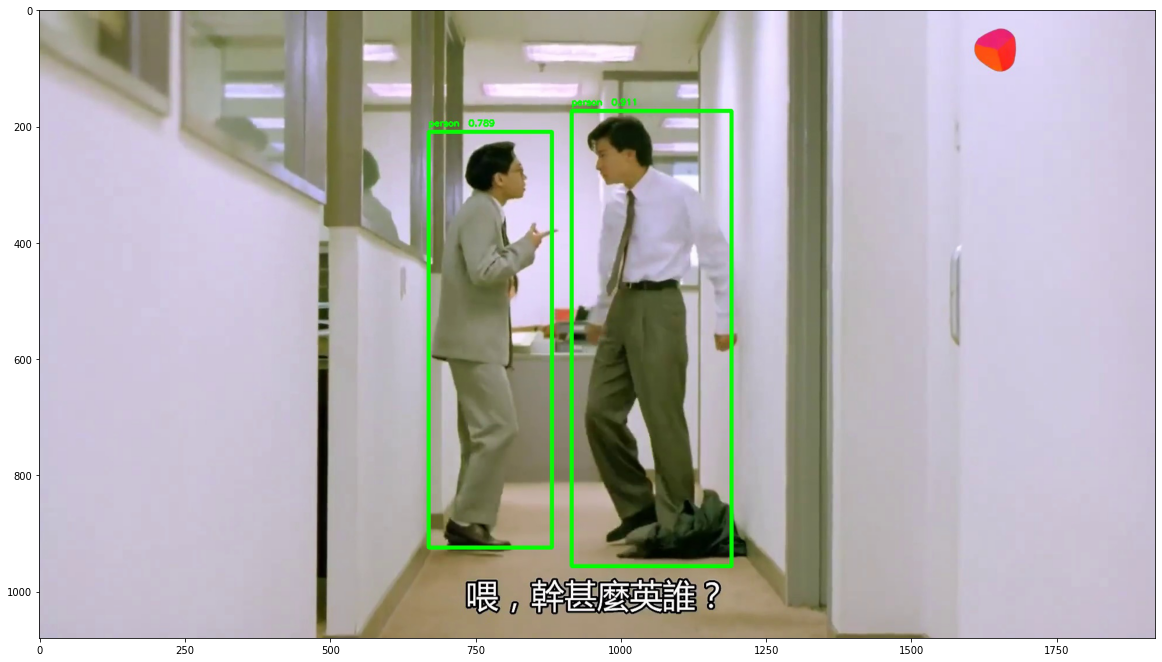

In [22]:
import matplotlib.pyplot as plt
image = plt.imread('./tutorial/demo/out.jpg')
plt.figure(figsize=(20, 20))
plt.imshow(image) 
plt.show()

Note that if the model was train on custom dataset, you have to modify the yaml file. 